#  Coding Assignment #3 - Fraud Detection Models

# Introduction to Fraud Detection Assignment

In this assignment, you will embark on an analytical journey to explore and model a dataset of card transactions with the aim of detecting fraudulent activities. The provided dataset includes various features such as distance from home, transaction details, and purchase patterns, which are essential in understanding the characteristics of fraudulent transactions. You will use Python and key machine learning libraries to analyze this dataset, build a classification model, and evaluate its performance.

## Base Code Provided
- The base code includes necessary Python imports and a decision tree model for initial analysis.
- You will start with a dataset of card transactions, exploring its structure, summary statistics, and event rate.
- The base code will guide you through data loading, preprocessing, model training, and evaluation.
- A visual representation of the decision tree will be created to help understand the model's decision-making process.

## Your Tasks
- **Data Analysis**: Deepen your understanding of the dataset by performing additional exploratory data analysis.
- **Model Building and Evaluation**: Beyond the decision tree, experiment with another model such as Random Forest to compare performance.
- **Performance Metrics**: Evaluate models using metrics like precision, recall, and F1-score, and understand the implications of these metrics in the context of fraud detection.
- **Advanced Techniques** (Extra Credit): Implement data balancing, feature importance analysis, and cross-validation to enhance model performance and robustness.

## Learning Outcomes
- Gain practical experience in handling real-world datasets.
- Develop skills in building and evaluating classification models.
- Learn to interpret model results and make data-driven decisions.
- Explore advanced machine learning techniques (optional extra credit).

## Submission Guidelines
- Submit your enhanced code with clear documentation and comments.
- Include a report or inline comments analyzing your findings and model performances.
- Ensure your code is clean, well-organized, and reproducible.


# Paul's Code


--- First 5 rows of data ---
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0        

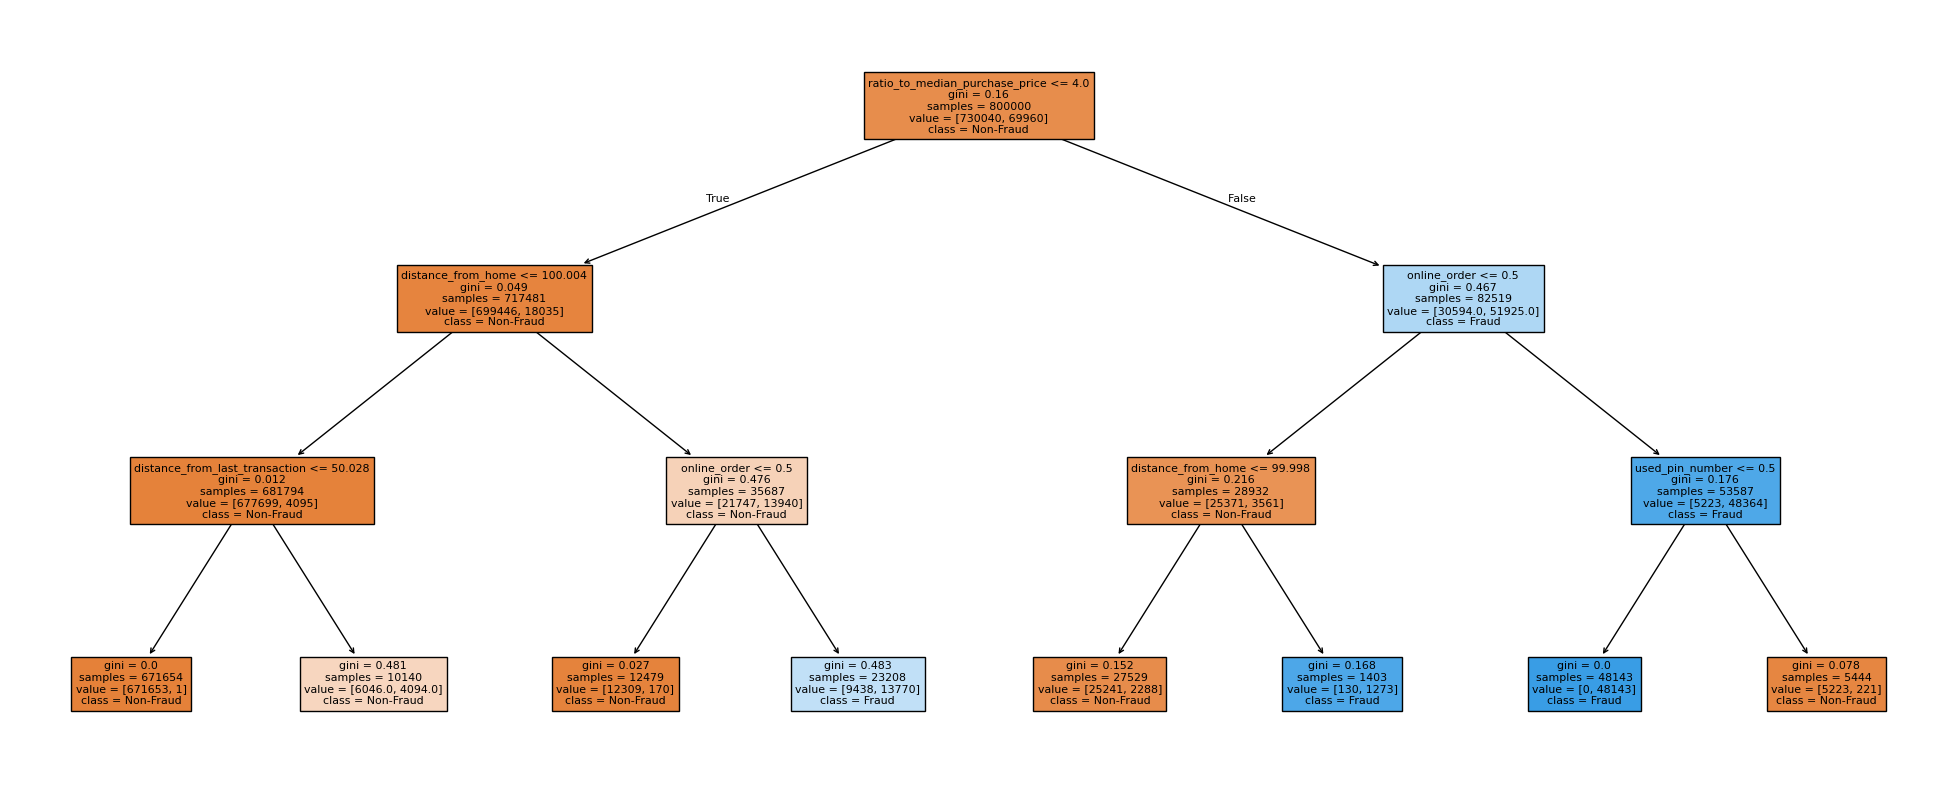

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

# Print the top 5 rows
print("\n--- First 5 rows of data ---")
print(data.head(5))

# Print summary stats
print("\n--- Summary Statistics ---")
print(data.describe())

# Event rate
print("\n--- Event Rate ---")
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
model = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Visualize the decision tree
plt.figure(figsize=(25, 10))
plot_tree(model,
          filled=True,
          feature_names=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
                         'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
          class_names=['Non-Fraud', 'Fraud'])
plt.show()

## Fraud Detection Model Workflow Summary

1. **Import Libraries**
   - `pandas` for data handling.
   - `numpy` for numerical operations.
   - `sklearn` for machine learning tools.
   - `matplotlib` for data visualization.

2. **Load Dataset**
   - Data is loaded from a remote URL using `pandas.read_csv`.

3. **Initial Data Exploration**
   - Initial examination using `data.head()` and `data.tail()` to understand dataset structure.

4. **Data Preparation**
   - Features (`X`) and target variable (`y`) are defined.
   - `fraud` column is the target, while others are features.

5. **Data Splitting**
   - Dataset is split into training and test sets.
   - `train_test_split` is used, with a test size of 20%.

6. **Model Initialization**
   - Decision Tree Classifier initialized with a maximum depth of 3.
   - Limits complexity and overfitting of the model.

7. **Model Training**
   - Model is trained using the training set (`X_train`, `y_train`).

8. **Prediction and Evaluation**
   - Model predictions made on the test set.
   - Evaluation using accuracy, confusion matrix, and classification report.

9. **Visualization**
   - Decision tree visualized using `matplotlib` and `sklearn.tree.plot_tree`.
   - Helps in understanding the decision-making process of the model.

# Commentary
- This code effectively demonstrates the end-to-end process of a machine learning project.
- Decision trees are a good choice for fraud detection due to their interpretability.
- The model is simple yet provides a decent understanding of the basic approach to fraud detection in financial transactions.
- Visualization is a key aspect, especially in complex domains like fraud detection, for understanding the model's decision criteria.

# Model Performance Analysis and Commentary

- **Data Overview**
  - First 5 rows show a mix of numerical features like `distance_from_home`, `distance_from_last_transaction`, etc., crucial for predicting fraud.
  - Summary statistics indicate a varied distribution of values, with some features having a wide range (e.g., `distance_from_home`).

- **Model Accuracy**
  - High accuracy of 98% suggests the model is very effective in classifying transactions as fraudulent or non-fraudulent.

- **Confusion Matrix Analysis**
  - Low number of false positives (2481) and false negatives (1646) compared to true positives and negatives.
  - Indicates a good balance in identifying both fraudulent and non-fraudulent transactions accurately.

- **Classification Report Insights**
  - High precision (0.99) for class 0 (Non-Fraud) and good precision (0.86) for class 1 (Fraud).
  - Recall is also high for both classes, especially for class 1 (0.91), which is critical in fraud detection.
  - F1-scores are robust, indicating a balanced model considering both precision and recall.

- **Overall Evaluation**
  - The decision tree model shows excellent performance in identifying fraud.
  - The balance between precision and recall, especially for fraud detection (class 1), is commendable.
  - High accuracy combined with the detailed metrics suggest a well-tuned model for this dataset.
  - The model could be further improved by exploring feature engineering, trying other algorithms, or tuning hyperparameters.


# Coding Assignment:  Comparative Analysis of Fraud Detection Models

## Objective
Enhance your skills in model evaluation and comparison in a real-world application: fraud detection. Using the provided Decision Tree model and dataset of card transactions, you will build a Random Forest model and compare its performance against the Decision Tree model.

## Tasks
1. **Model Building**:
   - Build a Random Forest model using the provided dataset.
2. **Model Evaluation**:
   - Calculate and interpret the precision and recall for the Random Forest model.
   - Generate and interpret the confusion matrix for the Random Forest model.
3. **Comparative Analysis**:
   - Compare the performance of the Decision Tree and Random Forest models using precision, recall, and confusion matrices.
   - Visualize the comparison using a bar chart.
4. **Reflection and Discussion**:
   - Discuss your findings, comparing the two models. Reflect on model performance, suitability for fraud detection, and potential issues like overfitting.

## Grading Rubric

**Total Points: 100**

1. **Model Building (30 Points)**:
   - Successfully building a Random Forest model: 30 points

2. **Model Evaluation (40 Points)**:
   - Correct calculation of precision and recall for the Random Forest model: 20 points
   - Correct generation and interpretation of the Random Forest confusion matrix: 20 points

3. **Comparative Analysis (20 Points)**:
   - Accurate comparison of model performance (including the provided Decision Tree model): 10 points
   - Clear and correct visualization using a bar chart: 10 points

4. **Reflection and Discussion (10 Points)**:
   - Cohesive and thoughtful discussion comparing the two models: 10 points

## Submission Guidelines
- Submit your work in a Jupyter Notebook or as a Python script with comments explaining your steps. You can also include your discussion in the notebook, as comments in your script, or in a separate text file.
- Ensure your plots and tables are clearly labeled and legible.

## Notes
- Be sure to demonstrate your understanding of the task and the models.



--- Decision Tree Model Performance Metrics ---
Accuracy: 0.98
Precision: 0.86
Recall: 0.91
F1-Score: 0.88
Confusion Matrix:
[[180076   2481]
 [  1646  15797]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    182557
         1.0       0.86      0.91      0.88     17443

    accuracy                           0.98    200000
   macro avg       0.93      0.95      0.94    200000
weighted avg       0.98      0.98      0.98    200000


--- Random Forest Model Performance Metrics ---
Accuracy: 0.99
Precision: 1.00
Recall: 0.91
F1-Score: 0.95
Confusion Matrix:
[[182549      8]
 [  1618  15825]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    182557
         1.0       1.00      0.91      0.95     17443

    accuracy                           0.99    200000
   macro avg       1.00      0.95      0.97    200000
weighted avg       0.99      0.99

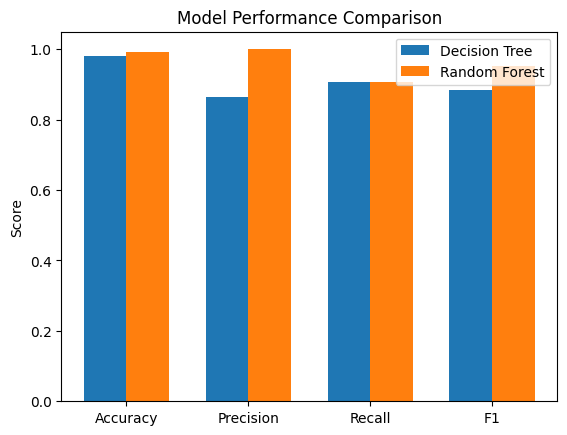

In [11]:
from sklearn.ensemble import RandomForestClassifier                     #Import the Random Forest Classifier
from sklearn.metrics import precision_score, recall_score, f1_score     #Import additional metrics needed for the comparison

#Calculate additional metrics for the Decision Tree (Model 1)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("\n--- Decision Tree Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Initialize a random forest classifier (Model 2).  Testing with an unpruned tree resulted in unrealistic
# accuracy, precision, recall and f1 scores (all were 1.0)
model2 = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,             # prune trees after 4 levels
    min_samples_split=5,     # require at least 5 samples to split a node
    min_samples_leaf=2,      # force leaves to have ≥2 samples
    random_state=42     # for reproducibility
)

# Train the model on the training data
model2.fit(X_train, y_train)

# Make predictions on the test data
y_pred2 = model2.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2)
confusion2 = confusion_matrix(y_test, y_pred2)
classification_rep2 = classification_report(y_test, y_pred2)

# Print the results
print("\n--- Random Forest Model Performance Metrics ---")
print(f"Accuracy: {accuracy2:.2f}")
print(f"Precision: {precision2:.2f}")
print(f"Recall: {recall2:.2f}")
print(f"F1-Score: {f12:.2f}")
print("Confusion Matrix:")
print(confusion2)
print("Classification Report:")
print(classification_rep2)

# Visualize and compare the results using a bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
model1_scores = [accuracy, precision, recall, f1]   # e.g. [accuracy1, precision1, recall1]
model2_scores = [accuracy2, precision2, recall2, f12]   # e.g. [accuracy2, precision2, recall2]

# X-axis locations and bar width
x = np.arange(len(metrics))
width = 0.35

# Create the grouped bar chart
plt.figure()
plt.bar(x - width/2, model1_scores, width, label='Decision Tree')
plt.bar(x + width/2, model2_scores, width, label='Random Forest')

# Labels and title
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()

# Display
plt.show()


1. **Model Evaluation**:
   - The random forest model achieved an accuracy of 0.99, a precision of 1.00, a recall of 0.91, and an f1 score of 0.95.  
   - Accuracy represents the percentage of correctly classified members among all members.  In this case, that is 198,374 out of 200,000, or 0.99.
   - Precision represents the percentage of correctly classified positive members among all those classified as positive (in this case, fraudulent). Since there were 182,549 properly classified positive records out of 182,557, this rounds to 1.00.
   - Recall represents the percentage of correctly classified negative members among all those classified as negative (in this case, non-fraud).  Since there were 15,825 members correctly classified as negative out of 17,443, this calculates to 0.91.
   - The F1 score is (2 X precision X recall)/(precision + recall), or 0.95. It is a summary statistic that combines precision and recall, giving them equal weights.
   - The confusion matrix shown above is used to calculate the previous metrics. It compares actual versus predicted classifications for all members of the dataset.
2. **Comparative Analysis**:
   - All of the scores for the Random Forest model were equal to or better than the scores for the Decision Tree model, as shown in the bar chart.
3. **Reflection and Discussion**:
   - The random forest model performed better than the decision tree model, although the first run with unpruned trees achieved scores of 1.00 across all scores, indicating overfitting.  This remains a risk with the pruned random forest; increasing the tree depth could probably achieve higher scores at the cost of overfitting.  One way to measure this risk would be to use cross-validation to evaluate the model over multiple test sets.
   - The results are as one would expect, since the random forest is simply an ensemble of decision trees, taking the best results among the generated trees.  Ensemble models are usually better predictors than single models, because they combine the results of multiple models, reducing the risk of random results being suboptimal.
   - With a fraud model, it is more important to minimize the number of false positives than it is to catch all the frauds, making a high recall more important than a high precision.  Since the recall was lower than the precision for the random forest model, it may actually be a less desirable choice than the decision tree, especially when the need for explainability is taken into account.  Balancing the data to increase the proportion of frauds could address this issue, allowing us to generate a more accurate model without too high of a false positive rate.

# Extra Credit: Advanced Model Enhancement and Evaluation

## Objective
Advance your data science expertise by applying more sophisticated techniques in model enhancement and evaluation within the context of fraud detection. This extra credit section includes data balancing, implementing cross-validation, and conducting a feature importance analysis.

## Tasks
1. **Balancing the Data**:
   - Utilize a technique like SMOTE or undersampling to balance the dataset.
   - Rebuild the Random Forest model using the balanced dataset.
2. **Cross-Validation**:
   - Implement 5-fold cross-validation for the Random Forest model.
   - Analyze the model's performance and stability based on cross-validation results.
3. **Feature Importance Analysis**:
   - Determine feature importance using the Random Forest model.
   - Present the feature importances in a table and a graph.

## Extra Credit Grading Rubric

**Total Points: 50**

1. **Balancing the Data (15 Points)**:
   - Correct application of a technique to balance the dataset: 7 points
   - Successful rebuilding of the Random Forest model with balanced data: 8 points

2. **Cross-Validation (20 Points)**:
   - Proper implementation of 5-fold cross-validation: 10 points
   - Comprehensive analysis of cross-validation results: 10 points

3. **Feature Importance Analysis (15 Points)**:
   - Accurate determination of feature importances: 7 points
   - Clear and informative presentation of feature importances in a table and graph: 8 points

## Submission Guidelines for Extra Credit
- Include your extra credit work in the same Jupyter Notebook or Python script as the main assignment.
- Clearly label the sections and outputs for the extra credit tasks.
- Ensure your analysis and visualizations are comprehensible and well-explained.

## Notes
- This extra credit section is optional and designed for students interested in deeper exploration of data science techniques.
- Focus on the quality of analysis and clarity of presentation for awarding points in this section.


In [16]:
# Use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the previously defined train test splits
smote = SMOTE(
    sampling_strategy='auto',  # oversample all minority classes to match the majority
    k_neighbors=5,             # default number of nearest neighbors for synthetic sampling
    random_state=42
)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print(" After SMOTE:", y_train_res.value_counts().to_dict())

# Refit the Random Forest model on the balanced data
model2.fit(X_train_res, y_train_res)

# Do the predictions, and print the classification report
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))

Before SMOTE: {0.0: 730040, 1.0: 69960}
 After SMOTE: {0.0: 730040, 1.0: 730040}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       0.98      0.99      0.99     17443

    accuracy                           1.00    200000
   macro avg       0.99      1.00      0.99    200000
weighted avg       1.00      1.00      1.00    200000



Using the balancing procedure, we get higher precision, recall and F1 scores without as much risk of overfitting.  To check this, we perform five-fold cross validation on the model:

In [19]:
#To do this, we need to create a pipeline and import the necessary cross-validation and scoring libraries
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# Build the pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model2', RandomForestClassifier(
        n_estimators=100,
        max_depth=4,             # prune trees after 4 levels
        min_samples_split=5,     # require at least 5 samples to split a node
        min_samples_leaf=2,      # force leaves to have ≥2 samples
        random_state=42          # for reproducibility
    ))
])

# Specify the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
}

# Run 5-fold CV
cv_results = cross_validate(
    pipeline,
    X, y,
    cv=5,
    scoring=scoring,
    return_train_score=False,  # only test scores
    n_jobs=-1
)

# Summarize the results
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize():<10}: "
          f"Mean = {scores.mean():.3f}, "
          f"Std = {scores.std():.3f}")
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
}


Accuracy  : Mean = 0.997, Std = 0.001
Precision : Mean = 0.975, Std = 0.012
Recall    : Mean = 0.994, Std = 0.001
F1        : Mean = 0.984, Std = 0.006


Analyzing the cross-validation results, we see the greatest variation in precision, which is also lower than recall, which is a good result for a fraud model.  This gives us confidence that the random forest is a good choice for our project, even though the example that we built before had a higher precision than recall.  The overall results likewise give us confidence in the results from the single model, because they show that the high scores are robust over the entire dataset, not just the section that we randomly set aside as a test set in the earlier run.

                          Feature  Importance
0  ratio_to_median_purchase_price    0.518949
1                    online_order    0.201681
2              distance_from_home    0.131779
3                 used_pin_number    0.053330
4  distance_from_last_transaction    0.048805
5                       used_chip    0.034479
6                 repeat_retailer    0.010977


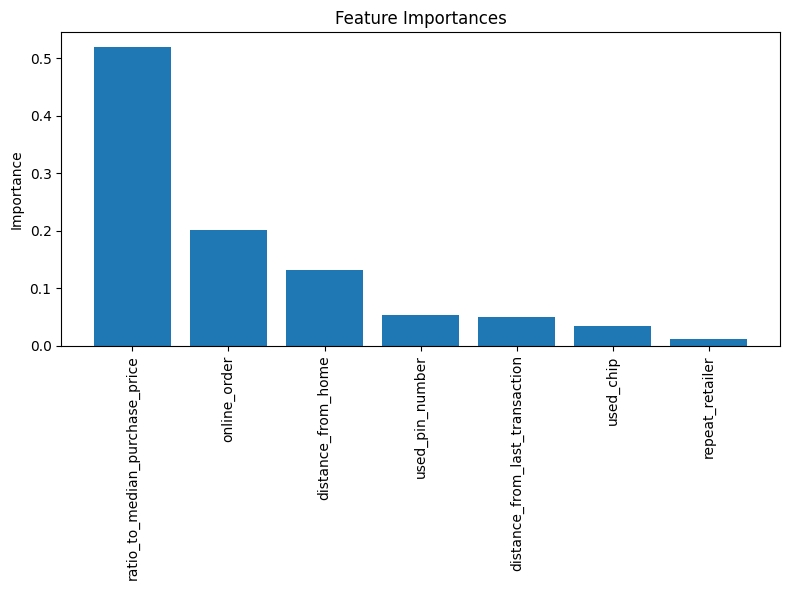

In [21]:
# Extract importances
importances = model2.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Put importances into a DataFrame
df_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort descending and display
df_importances = df_importances.sort_values('Importance', ascending=False).reset_index(drop=True)
print(df_importances)

# Plot
plt.figure(figsize=(8,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

From the preceding table and plot, we can see that the ratio to median purchase price is the most important feature in determining whether or not a record is classified as a fraud, and this is indeed the top node of the decision tree model.  Specifically, if the ratio is 4 or greater, the purchase is much more risky. After that, online orders are riskier than in-person orders, probably because identity verification is more difficult in an online environment.